### Практика по библиотекам numpy, scipy, pandas, matplotlib, seaborn

#### Среднее, медиана и мода

In [11]:
# Расчет с помощью scipy и numpy
import numpy as np
from scipy import stats
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])
# В numpy кажись нет моды :(
print('mode:', stats.mode(sample)[0][0])
print('median:', np.median(sample))
print('mean:', np.mean(sample))

mode: 172
median: 170.5
mean: 170.4


In [14]:
# Расчет с помощью pandas
import pandas as pd
sample = pd.Series([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])
print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())

mode: 0    172
dtype: int64
median: 170.5
mean: 170.4


In [23]:
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

#### Меры изменчивости

In [24]:
print('Размах:', np.max(sample) - np.min(sample))
print('Стандартное отклонение:', np.std(sample))

Размах: 28
Стандартное отклонение: 5.902541825349482


#### Диаграмма boxplot

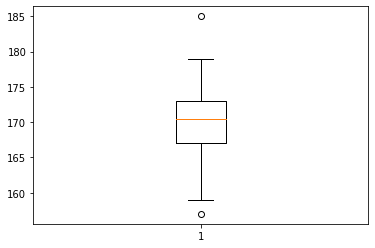

In [32]:
import matplotlib.pyplot as plt

plt.boxplot(sample)
plt.show()

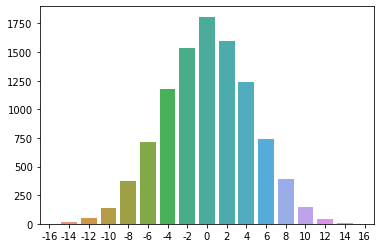

In [39]:
# Имитация доски Гальтона в коде
import seaborn as sns
data = dict()

# Кол-во шариков
N = 10000

# Кол-во уровней
level = 20

for _ in range(N):
    index = 0
    for _ in range(level):
        index += np.random.choice([-1, 1]) 
    data.setdefault(index, 0)
    data[index] += 1
sns.barplot(x = list(data.keys()), y = list(data.values()));

#### Z-преобразование

In [44]:
M = 175
sd = 8
value = 186.2
z = (value - M)/sd
print(round(z, ndigits = 2))

1.4


In [48]:
# 95% Наблюдений будет в диапазоне
M = 100
D = 25
sd = np.sqrt(D)

print('[', M - 2*sd, ',', M + 2*sd, ']')

[ 90.0 , 110.0 ]


In [86]:
# Какой процент людей c IQ > 125
import scipy as sp

M = 100
sd = 15
value = 125

sp.stats.norm.sf((value - M)/sd)

0.0477903522728147

In [74]:
# Какой приблизительно процент людей обладает IQ на 
# промежутке от 70 до 112

M = 100
sd = 15
value1 = 70
value2 = 112

p_value_left = sp.stats.norm.cdf((value1-M)/sd)
p_value_right = sp.stats.norm.sf((value2-M)/sd)
print(round(1 - p_value_left - p_value_right, ndigits = 2))

0.77


In [76]:
# Рассчитать стандартную ошибку

D = 4
N = 100

se = np.sqrt(D)/np.sqrt(N)
print(se)

0.2


In [83]:
# Рассчитать 99% доверительный интервал
x = 10
sd = 5
n = 100

print('[', x - 2.58 * (sd/np.sqrt(n)), ',', x + 2.58 * (sd/np.sqrt(n)) ,']')

[ 8.71 , 11.29 ]


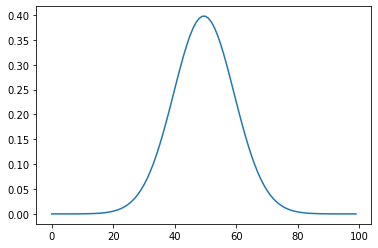

In [103]:
# T-распределение
x = np.linspace(-5, 5, 100)
y = sp.stats.t.pdf(x, df = 100)

plt.plot(y);

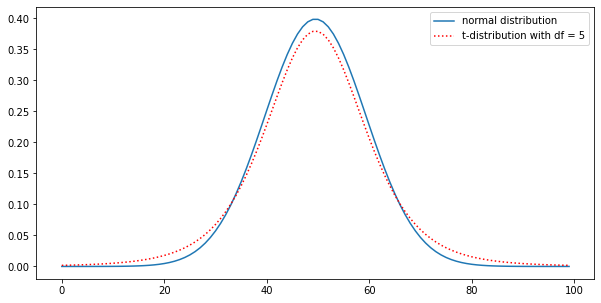

In [126]:
# Нормальное распределение
x = np.linspace(-5, 5, 100)
y1 = sp.stats.norm.pdf(x)
y2 = sp.stats.t.pdf(x, df = 5)
plt.figure(figsize=(10, 5))
plt.plot(y1)
plt.plot(y2, 'r:')
plt.legend(['normal distribution', 't-distribution with df = 5'], loc = 'upper right')
plt.show()

In [132]:
# Рассчитать p-уровень значимости (двусторонний)
mean = 10
t = -2
n = 15
round(sp.stats.t.cdf(t, df = n-1) * 2, ndigits = 3)

0.065

#### T-критерий Стьюдента

In [276]:
array1 = np.array([84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102, 69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5])

# Считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
dtfm = pd.DataFrame({'1-ая выборка':array1, '2-ая выборка':array2}).agg(['mean', 'std', 'count', 'sem']).T
dtfm.columns = ['Mx', 'SD', 'N', 'SE']

print(dtfm)

# Выясним являются ли значения статистически значимыми
df = len(array1) - 1

sd1 = dtfm.loc['1-ая выборка']['SD']
n1 = dtfm.loc['1-ая выборка']['N']

sd2 = dtfm.loc['2-ая выборка']['SD']
n2 = dtfm.loc['2-ая выборка']['N']

se = np.sqrt((sd1 ** 2 / n1) + (sd2 ** 2 / n2))

se1 = dtfm.loc['1-ая выборка']['SE']
se2 = dtfm.loc['2-ая выборка']['SE']

mean1 = array1.mean()
mean2 = array2.mean()
t = (mean1 - mean2) / se
p_value = 2*(1 - sp.stats.t.cdf(t, df))

print('p-value:', p_value)

# В одну строчку тоже самое
print('p-value in one line:', sp.stats.ttest_ind(array1, array2, alternative='two-sided')[1])

if p_value < 0.05:
    print('Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок')
else:
    print('Верна нулевая гипотеза H0 о равенстве средних значений данных выборок')
    
# 95% интервал отклонения среднего
# Возвращается кортеж
interval1 = sp.stats.t.interval(0.95, df, loc = mean1, scale = se1)
interval2 = sp.stats.t.interval(0.95, df, loc = mean2, scale = se2)

# Округляем значения
interval_arr1 = np.around(np.array(interval1), decimals = 2)
interval_arr2 = np.around(np.array(interval2), decimals = 2)

d = {'1-ая выборка':interval_arr1, '2-ая выборка':interval_arr2}
dtfm['interval'] = pd.Series(data = d)

dtfm

                   Mx         SD     N        SE
1-ая выборка  100.815  10.246503  20.0  2.291188
2-ая выборка   75.735  15.458102  20.0  3.456537
p-value: 8.113664646369756e-06
p-value in one line: 4.894702897415829e-07
Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок


,Mx,SD,N,SE,interval
1-ая выборка,100.815,10.246503,20.0,2.291188,"[96.02, 105.61]"
2-ая выборка,75.735,15.458102,20.0,3.456537,"[68.5, 82.97]"


In [238]:
array3 = np.array([101, 101, 107, 112, 108, 103, 101, 113, 103, 118, 103, 117, 119, 104, 114, 113, 106, 104, 110, 104])
array4 = np.array([116, 102, 109, 109, 119, 116, 115, 116, 105, 103, 111, 102, 114, 106, 105, 107, 113, 114, 107, 109])

dtfm = pd.DataFrame({'1-ая выборка':array3, '2-ая выборка':array4}).agg(['mean', 'std', 'count', 'sem']).T
dtfm.columns = ['Mx', 'SD', 'N', 'SE']

df = len(array3) - 1
print(dtfm)

sd1 = dtfm.loc['1-ая выборка']['SD']
n1 = dtfm.loc['1-ая выборка']['N']

sd2 = dtfm.loc['2-ая выборка']['SD']
n2 = dtfm.loc['2-ая выборка']['N']

se = np.sqrt((sd1 ** 2 / n1) + (sd2 ** 2 / n2))

mean1 = array4.mean()
mean2 = array3.mean()

t = (mean1 - mean2) / se

p_value = 2*(1 - sp.stats.t.cdf(t, df))
print('p-value:', p_value)

# В одну строчку тоже самое
print('p-value in one line:', sp.stats.ttest_ind(array3, array4, alternative='two-sided')[1])

if p_value < 0.05:
    print('Отклоняем нулевую гипотезу H0 о равенстве средних значений данных выборок')
else:
    print('Верна нулевая гипотеза H0 о равенстве средних значений данных выборок')

                  Mx        SD     N        SE
1-ая выборка  108.05  5.995393  20.0  1.340611
2-ая выборка  109.90  5.230477  20.0  1.169570
p-value: 0.3114564636004076
p-value in one line: 0.3049752508036721
Верна нулевая гипотеза H0 о равенстве средних значений данных выборок
